# How long a series to maximize expected winnings

## Riddler Classic 2017-07-14

https://fivethirtyeight.com/features/can-you-eat-more-pizza-than-your-siblings/

> Congratulations! The Acme Axegrinders, which you own, are the regular season champions of the National Squishyball League (NSL). Your team will now play a championship series against the Boondocks Barbarians, which had the second-best regular season record. You feel good about Acme’s chances in the series because Acme won exactly 60 percent of the hundreds of games it played against Boondocks this season. (The NSL has an incredibly long regular season.) The NSL has two special rules for the playoffs:
> 
> 1. The owner of the top-seeded team (i.e., you) gets to select the length of the championship series in advance of the first game, so you could decide to play a single game, a best two out of three series, a three out of five series, etc., all the way up to a 50 out of 99 series.
> 2. The owner of the winning team gets \$1 million minus \$10,000 for each of the victories required to win the series, regardless of how many games the series lasts in total. Thus, if the top-seeded team’s owner selects a single-game championship, the winning owner will collect \$990,000. If he or she selects a 4 out of 7 series, the winning team’s owner will collect \$960,000. The owner of the losing team gets nothing.
>
> Since Acme has a 60 percent chance of winning any individual game against Boondocks, Rule 1 encourages you to opt for a very long series to improve Acme’s chances of winning the series. But Rule 2 means that a long series will mean less winnings for you if Acme does take the series.
> 
> How long a series should you select in order to maximize your expected winnings? And how much money do you expect to win?

Let's first define some terms.

- $S$: a series with some number of games required to win it.
- $n$: the number of wins required for a series $S_n$.
- $N$: the maximum number of games a series $S_n$ can go.  $N = 2n-1$
- $m$: the number of total games a particular instance of a series went before a winner was determined.
- $w$: the number of wins in a particular instance of series.
- $P_n$: the probability of winning a series requiring $n$ wins.
- $P_{n,m}$: the probability of winning a series requiring $n$ wins in a total of $m$ games.

A series $S_n$ can be won in anywhere from $n$ to $2n-1$ games.  We can calculate the probability of winning the overall series by adding up the probabilities of each series run length.

$P_n = \sum\limits_{m=n}^{2n-1}P_{n,m}$

But we need to take care that we don't overcount.  That is, for a series $S_n$ that is won in $m$ games, we need to remove the combination of wins of $m-1$ games (because that series would have ended in $m-1$ games).

So there are a number of steps to calculate the overall probability.
1. Calculate the probability of winning a series requiring $n$ wins in $m$ games.
    - This takes into consideration the combinations of wins and losses as well as the probabilities of wins and losses.
    - Remove from this count those combinations that would have resulted in a shorter series.
2. Calculate the probability of winning the series by adding up the probabilities for all the possible series lengths.


In [1]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.misc
import seaborn as sns


def series_win_probability_of_length(n, m, p=0.6, verbose=False):
    """Return the probability of `n` wins for a series of length `m` games with a base win probaility of `p`.
    The wins and losses can occur in any order, but we are removing the occurrences of wins that result
    in a shorter series.
    The shortest the series can be is `n` games while the longest is `2n-1`.
    """
    assert n <= m, 'the number of wins {n} must be less than or equal to the number of games in the series {m}'.format(n=n, m=m)
    assert m <= 2*n - 1, 'the series length cannot be greater than 2n-1'
    losses = m - n
    all_combinations = scipy.misc.comb(m, n)
    # lesser_combinations = sum([scipy.misc.comb(i, n) for i in range(n, m)])
    lesser_combinations = scipy.misc.comb(m-1, n)
    n_combinations = all_combinations - lesser_combinations
    prob = p**n * (1-p)**losses * n_combinations
    if verbose:
        print('{} wins out of {} games, p={}'.format(n, m, p))
        print('all combinations:    {}'.format(all_combinations))
        print('lesser combinations: {}'.format(lesser_combinations))
        print('n_combinations:      {}'.format(n_combinations))
        print('probability:         {}'.format(prob))
    return prob


def series_win_probability(n, p=0.6, verbose=False):
    """Return the probability of winning a series requiring `n` wins with a base probability of `p`.
    """
    return sum([series_win_probability_of_length(n, m, p=p, verbose=verbose) for m in range(n, 2*n)])


series_win_probability_of_length(1, 1, p=0.6, verbose=True)

1 wins out of 1 games, p=0.6
all combinations:    1.0
lesser combinations: 0.0
n_combinations:      1.0
probability:         0.6


0.59999999999999998

In [10]:
series_win_probability_of_length(1, 1, p=0.4, verbose=True)

1 wins out of 1 games, p=0.4
all combinations:    1.0
lesser combinations: 0.0
n_combinations:      1.0
probability:         0.4


0.40000000000000002

So this is a good sanity check.

Let's check that the probabilities for the series going to $m$ games makes sense.

In [11]:
N = 2
p = 0.6
for m in range(N, 2*N):
    print('\tP of {} wins in {} games: {}'.format(N, m, series_win_probability_of_length(N, m, p=p, verbose=True)))

2 wins out of 2 games, p=0.6
all combinations:    1.0
lesser combinations: 0.0
n_combinations:      1.0
probability:         0.36
	P of 2 wins in 2 games: 0.36
2 wins out of 3 games, p=0.6
all combinations:    3.0
lesser combinations: 1.0
n_combinations:      2.0
probability:         0.288
	P of 2 wins in 3 games: 0.288


In [12]:
N = 2
p = 0.4
for m in range(N, 2*N):
    print('\tP of {} wins in {} games: {}'.format(N, m, series_win_probability_of_length(N, m, p=p, verbose=True)))

2 wins out of 2 games, p=0.4
all combinations:    1.0
lesser combinations: 0.0
n_combinations:      1.0
probability:         0.16000000000000003
	P of 2 wins in 2 games: 0.16000000000000003
2 wins out of 3 games, p=0.4
all combinations:    3.0
lesser combinations: 1.0
n_combinations:      2.0
probability:         0.19200000000000003
	P of 2 wins in 3 games: 0.19200000000000003


Let's also check that all the probabilities sum to 1.

In [14]:
N = 2
p = 0.6

print('\t{}'.format(series_win_probability(N, p=p)))
print('\t{}'.format(series_win_probability(N, p=1-p)))
print('\ntotal probability: {}'.format(series_win_probability(N, p=p) + series_win_probability(N, p=1-p)))

	0.6479999999999999
	0.3520000000000001

total probability: 1.0


In [15]:
N = 3
p = 0.6

print('\t{}'.format(series_win_probability(N, p=p)))
print('\t{}'.format(series_win_probability(N, p=1-p)))
print('\ntotal probability: {}'.format(series_win_probability(N, p=p) + series_win_probability(N, p=1-p)))

	0.68256
	0.31744000000000006

total probability: 1.0


In [16]:
N = 50
p = 0.6
print('\t{}'.format(series_win_probability(N, p=p)))
print('\t{}'.format(series_win_probability(N, p=1-p)))
print('\ntotal probability: {}'.format(series_win_probability(N, p=p) + series_win_probability(N, p=1-p)))

	0.978069557869915
	0.021930442130085215

total probability: 1.0000000000000002


So now that we have the probability of the team winning the series given the number of required wins $n$, we can calculate the expected value $E$.

In [17]:
def expected_value(n, p=0.6, total_payout=10**6, win_cost=10**4, verbose=False):
    """Get the expected value for winning a series given the number of games required $n$
    and the win probability $p$.
    """
    p = series_win_probability(n, p=p, verbose=verbose)
    payout = total_payout - n * win_cost
    val = p * payout
    return val

expected_value(1)

594000.0

Calculate all the probabilities and payouts for series from 1 to 50 games.  We'll put it in a DataFrame for convenient plotting.

In [18]:
p = 0.6
total_payout=10**6
win_cost = 10**4

wins_required = np.arange(1, 51)
# series_win_p = series_win_probability(wins_required, p=p, verbose=False)
series_win_p = [series_win_probability(w, p=p, verbose=False) for w in wins_required]
payout = [total_payout - w * win_cost for w in wins_required]
e_value = [expected_value(w, p=p) for w in wins_required]

df = pd.DataFrame(
    data={
        'series_win_probability': series_win_p,
        'payout': payout,
        'expected_value': e_value,
        'wins_required': wins_required,
    }
)
df.head()

,expected_value,payout,series_win_probability,wins_required
0,594000.000,990000,0.600000,1
1,635040.000,980000,0.648000,2
2,662083.200,970000,0.682560,3
3,681799.680,960000,0.710208,4
4,696760.704,950000,0.733432,5


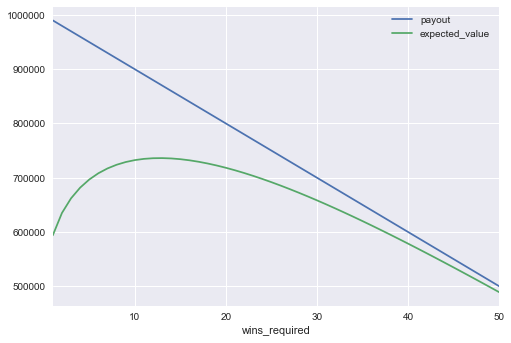

In [19]:
df.plot.line(x='wins_required', y=['payout', 'expected_value'])

In [26]:
df.iloc[df['expected_value'].argmax()]

expected_value            736222.040991
payout                    870000.000000
series_win_probability         0.846232
wins_required                 13.000000
Name: 12, dtype: float64

Let's put this altogether in an interactive form.

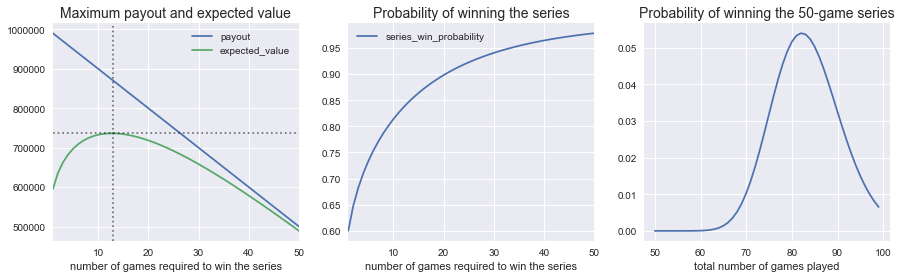

In [33]:
def calculate_and_plot(n_max=50, p=0.6, total_payout=10**6, win_cost=10**4):
    """Calculate and plot the probabilities and payouts for various lengths of series.
    """
    wins_required = np.arange(1, n_max+1)
    # series_win_p = series_win_probability(wins_required, p=p, verbose=False)
    series_win_p = [series_win_probability(w, p=p, verbose=False) for w in wins_required]
    payout = [total_payout - w * win_cost for w in wins_required]
    e_value = [expected_value(w, p=p) for w in wins_required]

    df = pd.DataFrame(
        data={
            'series_win_probability': series_win_p, 
            'payout': payout, 
            'expected_value': e_value,
            'wins_required': wins_required,
        }
    )
    max_row = df.iloc[df['expected_value'].argmax()]
    max_index = max_row['wins_required']
    max_value = max_row['expected_value']
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
    df.plot.line(x='wins_required', y=['payout', 'expected_value'], ax=ax0)
    ax0.axhline(y=max_value, linestyle='dotted', color='black', alpha=0.5)
    ax0.axvline(x=max_index, linestyle='dotted', color='black', alpha=0.5)
    ax0.set_title('Maximum payout and expected value', fontsize=14)
    ax0.set_xlabel('number of games required to win the series')
    
    df.plot.line(x='wins_required', y='series_win_probability', ax=ax1)
    ax1.set_title('Probability of winning the series', fontsize=14)
    ax1.set_xlabel('number of games required to win the series')
    
    series_lengths = np.arange(n_max, 2*n_max)
    p_win_at_length = [series_win_probability_of_length(n_max, m, p=p) for m in series_lengths]
    ax2.plot(series_lengths, p_win_at_length)
    ax2.set_title('Probability of winning the {}-game series'.format(n_max), fontsize=14)
    ax2.set_xlabel('total number of games played')


calculate_and_plot(n_max=50, p=0.6)